<a href="https://colab.research.google.com/github/m-bashari-m/vehicle-color-recognition/blob/main/src/6_best_model_and_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget https://raw.githubusercontent.com/m-bashari-m/vehicle-color-recognition/main/src/utils.py

--2022-06-08 20:40:14--  https://raw.githubusercontent.com/m-bashari-m/vehicle-color-recognition/main/src/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11788 (12K) [text/plain]
Saving to: ‘utils.py.1’

utils.py.1          100%[===================>]  11.51K  --.-KB/s    in 0s      

2022-06-08 20:40:14 (53.5 MB/s) - ‘utils.py.1’ saved [11788/11788]



In [4]:
from google.colab import drive
drive.mount('./drive')

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import os

import tensorflow as tf
from tensorflow import keras

!pip install -q tensorflow-io
import tensorflow_io as tfio

from utils import get_train_val_ds, ErrorAnalyzer, get_class_weight, get_model

2022-06-16 04:29:45.566662: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-16 04:29:45.566695: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [ ]:
os.system('docker inspect tf-serving | grep -w IPAddress')

In [6]:
BATCH_SIZE = 64
IMG_SIZE = (256, 256)
AUTOTUNE = tf.data.AUTOTUNE
N_CLASSES = 16

In [7]:
dataset_dir = os.path.join('drive', 'MyDrive', 'cars')
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')

In [8]:
_, val_ds = get_train_val_ds(train_dir, val_dir, batch_size=BATCH_SIZE, img_size=IMG_SIZE)

Found 17043 files belonging to 16 classes.
Found 3495 files belonging to 16 classes.


In [9]:
file_paths = val_ds.file_paths

In [10]:
def combine_rgb_xyz(img_batch):
  img_batch_xyz = tfio.experimental.color.rgb_to_xyz(img_batch)
  return (img_batch + img_batch_xyz) / 2

In [11]:
rgb_ds = (
    val_ds.
    map(lambda img, lbl: (img/255., lbl), num_parallel_calls=AUTOTUNE).
    prefetch(AUTOTUNE))

In [12]:
xyz_ds = (
    val_ds.
    map(lambda img, lbl: (img/255., lbl), num_parallel_calls=AUTOTUNE).
    map(lambda img, lbl: (tfio.experimental.color.rgb_to_xyz(img), lbl), num_parallel_calls=AUTOTUNE).
    prefetch(AUTOTUNE))

In [13]:
hsv_ds = (
    val_ds.
    map(lambda img, lbl: (img/255., lbl), num_parallel_calls=AUTOTUNE).
    map(lambda img, lbl: (tf.image.rgb_to_hsv(img), lbl), num_parallel_calls=AUTOTUNE).
    prefetch(AUTOTUNE))

In [14]:
rgb_xyz_ds = (
    val_ds.
    map(lambda img, lbl: (img/255., lbl), num_parallel_calls=AUTOTUNE).
    map(lambda img, lbl: (combine_rgb_xyz(img), lbl), num_parallel_calls=AUTOTUNE).
    prefetch(AUTOTUNE))

In [15]:
classes, _ = get_class_weight()

# RGB models

## Epoch

### #25

In [18]:
rgb_25 = get_model('rgb-model-25.h5')

rgb_analyzer_25 = ErrorAnalyzer(model=rgb_25,
                                model_name='RGB-25',
                                ds=rgb_ds,
                                classes=classes,
                                file_paths=file_paths)

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Confusion matrix is saved


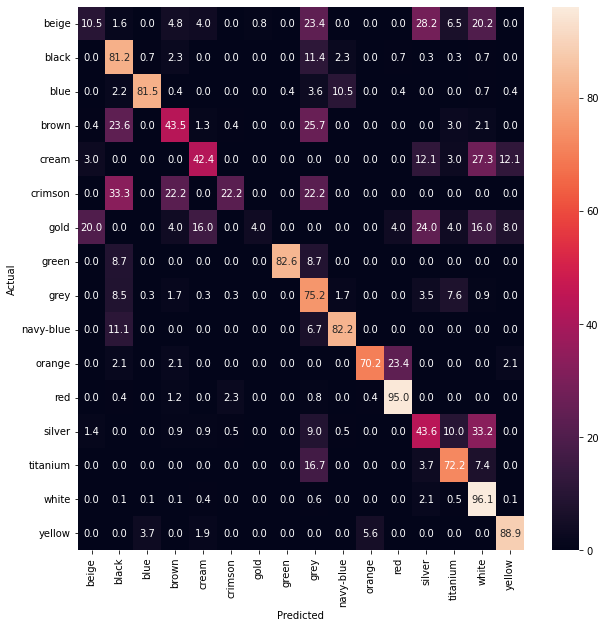

Calculateing error types...
Writing in log file...
All done. Check log file => RGB-25.csv
Accuracy: %79.23
Precision mean: 0.659
Recall mean: 0.6195625


In [19]:
rgb_analyzer_25.plot_confusion_mat()
rgb_analyzer_25.evaluate_model()

### #40

In [21]:
rgb_40 = get_model('rgb-model-40.h5')

rgb_analyzer_40 = ErrorAnalyzer(model=rgb_40,
                                model_name='RGB-40',
                                ds=rgb_ds,
                                classes=classes,
                                file_paths=file_paths)

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Confusion matrix is saved


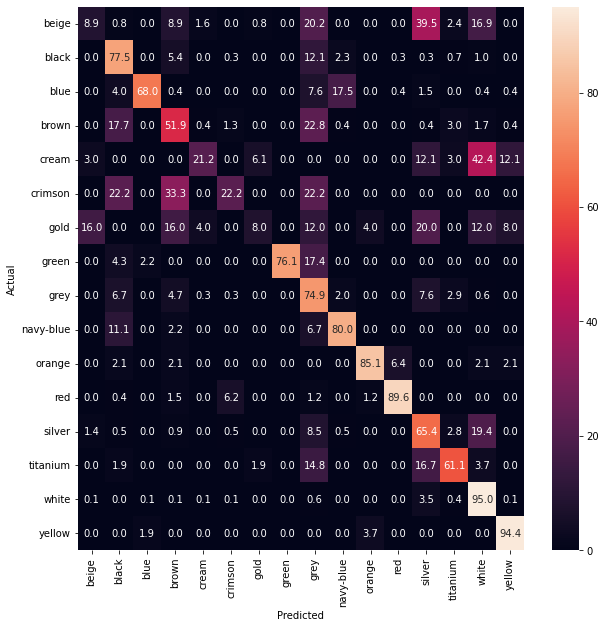

Calculateing error types...
Writing in log file...
All done. Check log file => RGB-40.csv
Accuracy: %78.63
Precision mean: 0.64975
Recall mean: 0.6120625


In [22]:
rgb_analyzer_40.plot_confusion_mat()
rgb_analyzer_40.evaluate_model()

### #50

In [23]:
rgb_50 = get_model('rgb-model-50.h5')

rgb_analyzer_50 = ErrorAnalyzer(model=rgb_50,
                                model_name='RGB-50',
                                ds=rgb_ds,
                                classes=classes,
                                file_paths=file_paths)

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Confusion matrix is saved


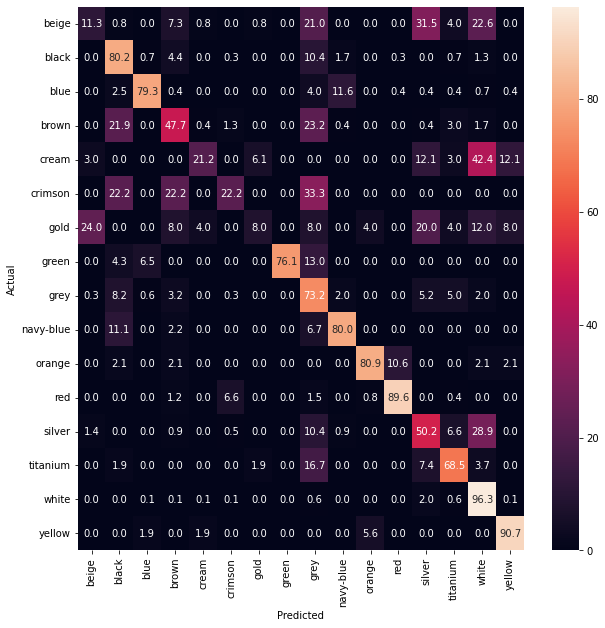

Calculateing error types...
Writing in log file...
All done. Check log file => RGB-50.csv
Accuracy: %79.0
Precision mean: 0.6498750000000001
Recall mean: 0.609625


In [24]:
rgb_analyzer_50.plot_confusion_mat()
rgb_analyzer_50.evaluate_model()

### #60

In [25]:
rgb_60 = get_model('rgb-model-60.h5')

rgb_analyzer_60 = ErrorAnalyzer(model=rgb_60,
                                model_name='RGB-60',
                                ds=rgb_ds,
                                classes=classes,
                                file_paths=file_paths)

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Confusion matrix is saved


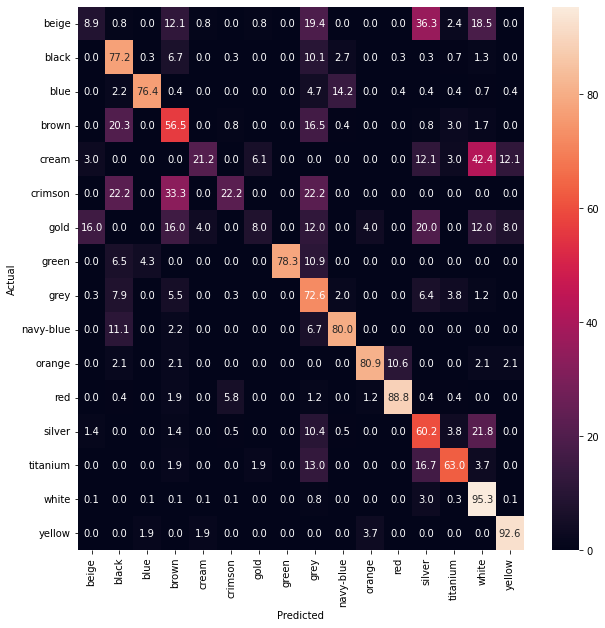

Calculateing error types...
Writing in log file...
All done. Check log file => RGB-60.csv
Accuracy: %79.08
Precision mean: 0.6534374999999999
Recall mean: 0.6138125


In [26]:
rgb_analyzer_60.plot_confusion_mat()
rgb_analyzer_60.evaluate_model()

# XYZ model

## Epoch

### #25

In [36]:
xyz_25 = get_model('xyz-model-25.h5')

xyz_analyzer_25 = ErrorAnalyzer(model=xyz_25,
                                model_name='XYZ-25',
                                ds=xyz_ds,
                                classes=classes,
                                file_paths=file_paths)

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Confusion matrix is saved


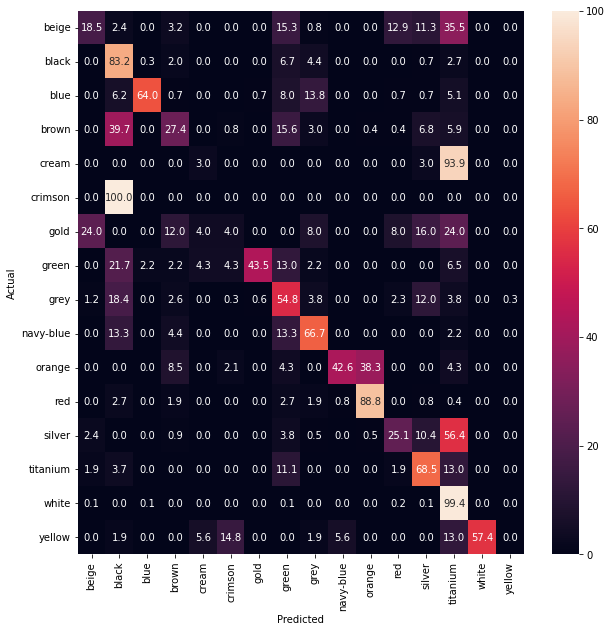

Calculateing error types...
Writing in log file...
All done. Check log file => XYZ-25.csv
Accuracy: %16.57
Precision mean: 0.20199999999999999
Recall mean: 0.171625


In [37]:
xyz_analyzer_25.plot_confusion_mat()
xyz_analyzer_25.evaluate_model()

### #40

In [38]:
xyz_40 = get_model('xyz-model-40.h5')

xyz_analyzer_40 = ErrorAnalyzer(model=xyz_40,
                                model_name='XYZ-40',
                                ds=xyz_ds,
                                classes=classes,
                                file_paths=file_paths)

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Confusion matrix is saved


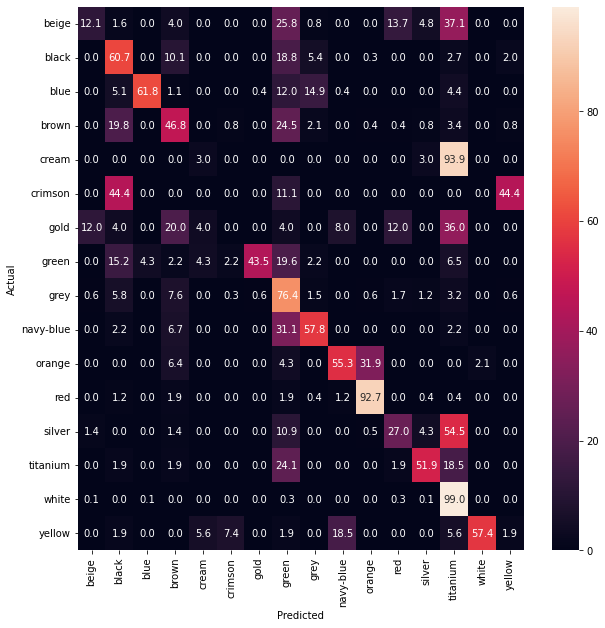

Calculateing error types...
Writing in log file...
All done. Check log file => XYZ-40.csv
Accuracy: %15.079999999999998
Precision mean: 0.20787499999999995
Recall mean: 0.16381250000000003


In [39]:
xyz_analyzer_40.plot_confusion_mat()
xyz_analyzer_40.evaluate_model()

### #55

In [40]:
xyz_55 = get_model('xyz-model-55.h5')

xyz_analyzer_55 = ErrorAnalyzer(model=xyz_55,
                                model_name='XYZ-55',
                                ds=xyz_ds,
                                classes=classes,
                                file_paths=file_paths)

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Confusion matrix is saved


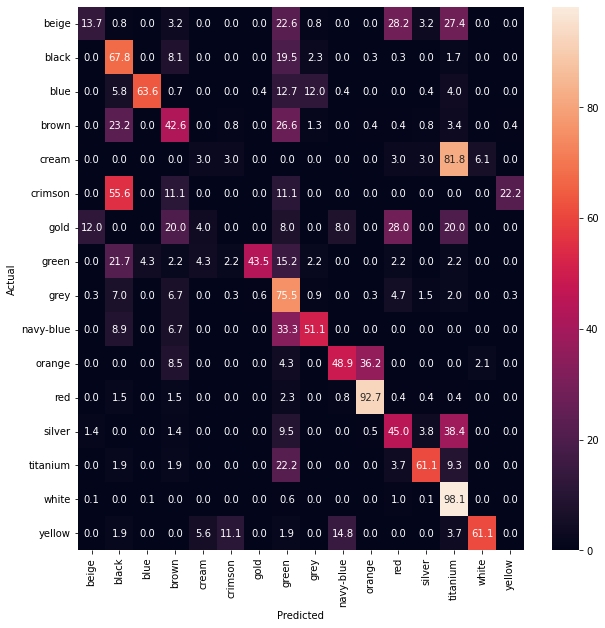

Calculateing error types...
Writing in log file...
All done. Check log file => XYZ-55.csv
Accuracy: %15.36
Precision mean: 0.20456249999999995
Recall mean: 0.1603125


In [41]:
xyz_analyzer_55.plot_confusion_mat()
xyz_analyzer_55.evaluate_model()

### #65

In [42]:
xyz_65 = get_model('xyz-model-65.h5')

xyz_analyzer_65 = ErrorAnalyzer(model=xyz_65,
                                model_name='XYZ-65',
                                ds=xyz_ds,
                                classes=classes,
                                file_paths=file_paths)

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Confusion matrix is saved


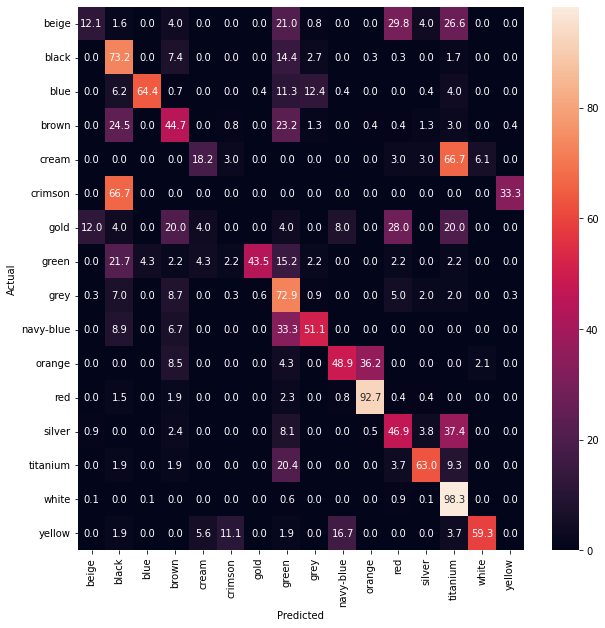

Calculateing error types...
Writing in log file...
All done. Check log file => XYZ-65.csv
Accuracy: %16.11
Precision mean: 0.22575
Recall mean: 0.174


In [43]:
xyz_analyzer_65.plot_confusion_mat()
xyz_analyzer_65.evaluate_model()

# HSV models

## Epoch

### #25

In [18]:
hsv_25 = get_model('hsv-model-25.h5')

hsv_analyzer_25 = ErrorAnalyzer(model=hsv_25,
                                model_name='HSV-25',
                                ds=hsv_ds,
                                classes=classes,
                                file_paths=file_paths)

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Confusion matrix is saved


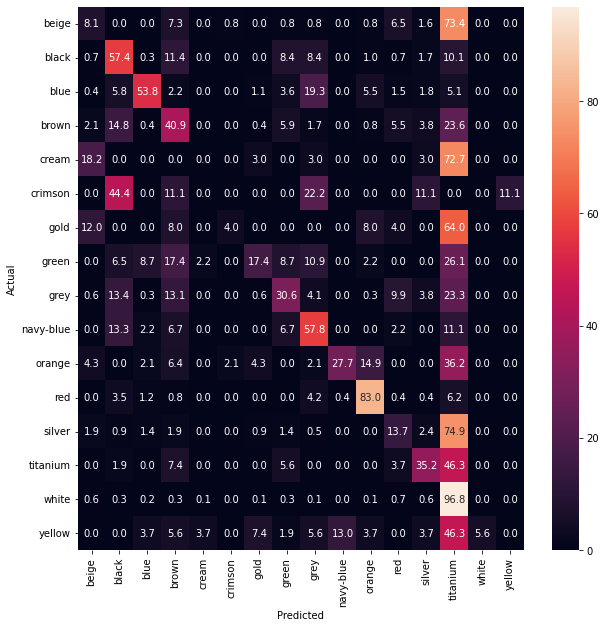

Calculateing error types...
Writing in log file...
All done. Check log file => HSV-25.csv
Accuracy: %13.79
Precision mean: 0.14743749999999997
Recall mean: 0.148125


In [19]:
hsv_analyzer_25.plot_confusion_mat()
hsv_analyzer_25.evaluate_model()

### #35

In [ ]:
hsv_35 = get_model('hsv-model-35.h5')

hsv_analyzer_35 = ErrorAnalyzer(model=hsv_35,
                                model_name='HSV-35',
                                ds=hsv_ds,
                                classes=classes,
                                file_paths=file_paths)

In [ ]:
hsv_analyzer_35.plot_confusion_mat()
hsv_analyzer_35.evaluate_model()

### #55

In [ ]:
hsv_55 = get_model('hsv-model-55.h5')

hsv_analyzer_55 = ErrorAnalyzer(model=hsv_55,
                                model_name='HSV-55',
                                ds=hsv_ds,
                                classes=classes,
                                file_paths=file_paths)

In [ ]:
hsv_analyzer_55.plot_confusion_mat()
hsv_analyzer_55.evaluate_model()

# RGB-XYZ  models

## Epoch

### #25

In [20]:
rgb_xyz_25 = get_model('rgb-xyz-model-25.h5')

rgb_xyz_analyzer_25 = ErrorAnalyzer(model=rgb_xyz_25,
                                model_name='RGB-XYZ-25',
                                ds=rgb_xyz_ds,
                                classes=classes,
                                file_paths=file_paths)

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Confusion matrix is saved


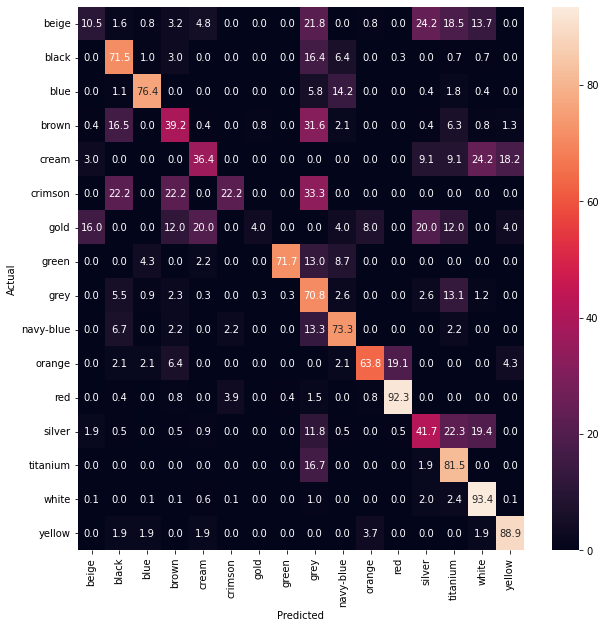

Calculateing error types...
Writing in log file...
All done. Check log file => RGB-XYZ-25.csv
Accuracy: %75.62
Precision mean: 0.6010625
Recall mean: 0.5859999999999999


In [21]:
rgb_xyz_analyzer_25.plot_confusion_mat()
rgb_xyz_analyzer_25.evaluate_model()

### #40

In [22]:
rgb_xyz_40 = get_model('rgb-xyz-model-40.h5')

rgb_xyz_analyzer_40 = ErrorAnalyzer(model=rgb_xyz_40,
                                model_name='RGB-XYZ-40',
                                ds=rgb_xyz_ds,
                                classes=classes,
                                file_paths=file_paths)

ValueError: ignored

In [ ]:
rgb_xyz_analyzer_40.plot_confusion_mat()
rgb_xyz_analyzer_40.evaluate_model()

### #50

In [49]:
rgb_xyz_50 = get_model('rgb-xyz-model-50.h5')

rgb_xyz_analyzer_50 = ErrorAnalyzer(model=rgb_xyz_50,
                                model_name='RGB-XYZ-50',
                                ds=rgb_xyz_ds,
                                classes=classes,
                                file_paths=file_paths)

ValueError: ignored

In [ ]:
rgb_xyz_analyzer_50.plot_confusion_mat()
rgb_xyz_analyzer_50.evaluate_model()

### #61

In [23]:
rgb_xyz_61 = get_model('rgb-xyz-model-61.h5')

rgb_xyz_analyzer_61 = ErrorAnalyzer(model=rgb_xyz_61,
                                model_name='RGB-XYZ-61',
                                ds=rgb_xyz_ds,
                                classes=classes,
                                file_paths=file_paths)

ValueError: ignored

In [ ]:
rgb_xyz_analyzer_61.plot_confusion_mat()
rgb_xyz_analyzer_61.evaluate_model()

In [2]:
!zip -r logs-1.zip logs

  adding: logs/ (stored 0%)
  adding: logs/statistic/ (stored 0%)
  adding: logs/statistic/RGB-25.csv (deflated 47%)
  adding: logs/statistic/RGB-60.csv (deflated 47%)
  adding: logs/statistic/RGB-50.csv (deflated 45%)
  adding: logs/statistic/XYZ-40.csv (deflated 73%)
  adding: logs/statistic/images/ (stored 0%)
  adding: logs/statistic/images/XYZ-65.jpg (deflated 16%)
  adding: logs/statistic/images/RGB-XYZ-25.jpg (deflated 15%)
  adding: logs/statistic/images/RGB-50.jpg (deflated 16%)
  adding: logs/statistic/images/XYZ-25.jpg (deflated 16%)
  adding: logs/statistic/images/XYZ-55.jpg (deflated 16%)
  adding: logs/statistic/images/RGB-60.jpg (deflated 16%)
  adding: logs/statistic/images/XYZ-40.jpg (deflated 16%)
  adding: logs/statistic/images/RGB-25.jpg (deflated 16%)
  adding: logs/statistic/images/RGB-40.jpg (deflated 16%)
  adding: logs/statistic/RGB-XYZ-25-conf-mat.npy (deflated 73%)
  adding: logs/statistic/XYZ-25-conf-mat.npy (deflated 73%)
  adding: logs/statistic/RGB-XYZ-25